## Using Databricks

### Basic operations
What is:
- A notebook
- A code cell

How to:
- Create a notebook
- Run a code cell
- Autosave and revision history
- Cluster is off

### Write Python or R code in Databricks

In [4]:
%python

message = "Hello World"
print(message)

Hello World

In [5]:
%r

message <- "Hello World"
print(message)

[1] "Hello World"

### Data analysis in the normal way

**Reading data from an external source**

Python: pandas read_csv function, document at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

R: SparkR read.csv function, document at: https://stat.ethz.ch/R-manual/R-devel/library/utils/html/read.table.html

In [8]:
%python

import pandas as pd

data = pd.read_csv("https://github.com/lindayi/MMA865-Fall19/releases/download/dataset/sample_data.csv", header = 0)
print(data.head(5))

id x y
0 1 5.2 5.9
1 2 5.4 10.2
2 3 0.5 2.2
3 4 9.2 14.9
4 5 4.7 7.7

In [9]:
%r

data <- read.csv("https://github.com/lindayi/MMA865-Fall19/releases/download/dataset/sample_data.csv", header=TRUE)
print(head(data, 5))

id x y
1 1 5.2 5.9
2 2 5.4 10.2
3 3 0.5 2.2
4 4 9.2 14.9
5 5 4.7 7.7

**Get some basic statistics**

In [11]:
%python

import numpy as np

print("Count of records:", len(data))
print("Median of x:", np.median(data["x"]))
print("Max of y:", np.max(data["y"]))

Count of records: 20
Median of x: 5.15
Max of y: 18.9

In [12]:
%r

print(paste("Count of records: ", nrow(data)))
print(paste("Median of x: ", median(data[,"x"])))
print(paste("Max of y: ", max(data[,"y"])))

[1] "Count of records: 20"
[1] "Median of x: 5.15"
[1] "Max of y: 18.9"

**Plot some figures**

_Reference: https://blog.arinti.be/azure-databricks-plotting-data-made-simple-e3b70a0b1a14_

In [14]:
%python

display(data)

id,x,y
1,5.2,5.9
2,5.4,10.2
3,0.5,2.2
4,9.2,14.9
5,4.7,7.7
6,1.3,2.0
7,3.4,12.7
8,3.2,5.6
9,8.0,15.3
10,9.4,18.9


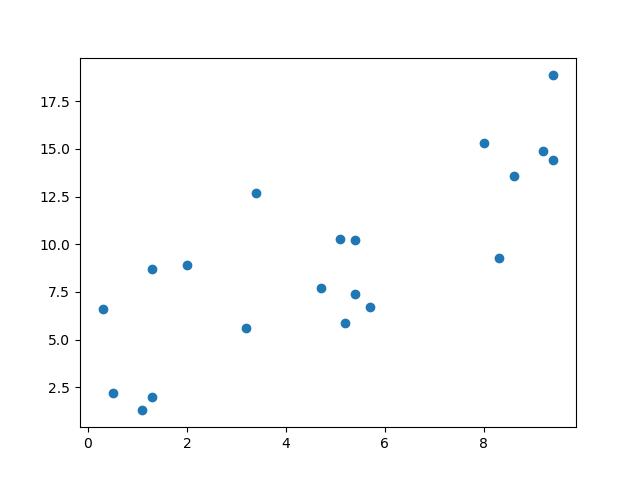

In [15]:
%python

import matplotlib.pyplot as plt

fig, ax = plt.subplots() 
ax.scatter(data["x"], data["y"], alpha=1)
display(fig)

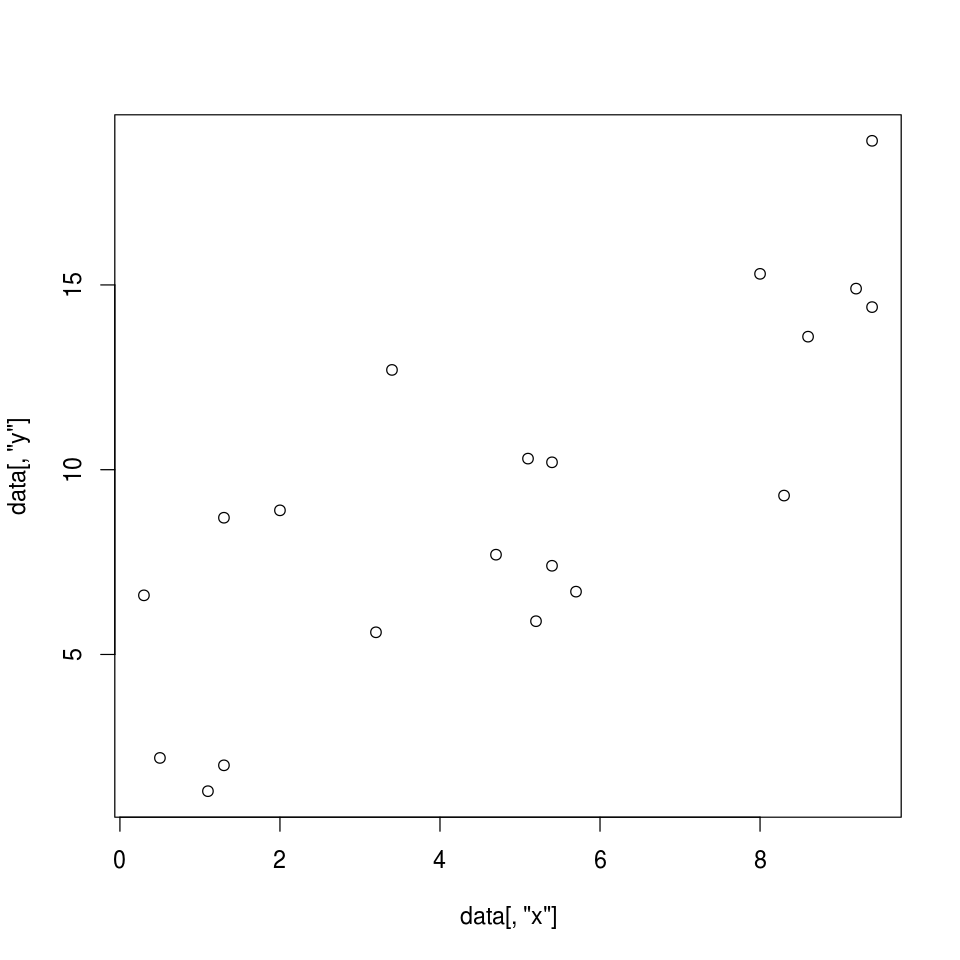

In [16]:
%r

plot(data[,"x"], data[,"y"])

### Data Analysis in the Spark way

**Reading data from an external source**

Python: Pyspark spark.read.csv function, document at: https://spark.apache.org/docs/latest/api/python/pyspark.sql.html?highlight=read%20csv#pyspark.sql.DataFrameReader.csv

R: SparkR read.df function, document at: https://spark.apache.org/docs/latest/api/R/read.df.html

In [19]:
%python

df = spark.sql("select * from tmp.sample_data")
display(df)

id,x,y
1,5.2,5.9
2,5.4,10.2
3,0.5,2.2
4,9.2,14.9
5,4.7,7.7
6,1.3,2.0
7,3.4,12.7
8,3.2,5.6
9,8.0,15.3
10,9.4,18.9


In [20]:
%r

library(SparkR)

df = sql("select * from tmp.sample_data")
display(df)

id,x,y
1,5.2,5.9
2,5.4,10.2
3,0.5,2.2
4,9.2,14.9
5,4.7,7.7
6,1.3,2.0
7,3.4,12.7
8,3.2,5.6
9,8.0,15.3
10,9.4,18.9


**Basic stats**

In [22]:
%python

print("Count of records:", df.count())
print("Median of x:", df.approxQuantile("x", [0.5], 0)[0])
print("Max of y:", df.agg({"y": "max"}).collect()[0]["max(y)"])

Count of records: 20
Median of x: 5.1
Max of y: 18.9

In [23]:
%r

print(paste("Count of records: ", count(df)))
print(paste("Median of x: ", approxQuantile(df, "x", c(0.5), 0)))
print(paste("Max of y: ", first(agg(df, max = max(df$y)))$max))

[1] "Count of records: 20"
[1] "Median of x: 5.1"
[1] "Max of y: 18.9"

**Plot some figures**

We first collect data back to the master node, then do plotting exactly as if we are writing normal python / R code

In [25]:
%python

display(df)

id,x,y
1,5.2,5.9
2,5.4,10.2
3,0.5,2.2
4,9.2,14.9
5,4.7,7.7
6,1.3,2.0
7,3.4,12.7
8,3.2,5.6
9,8.0,15.3
10,9.4,18.9


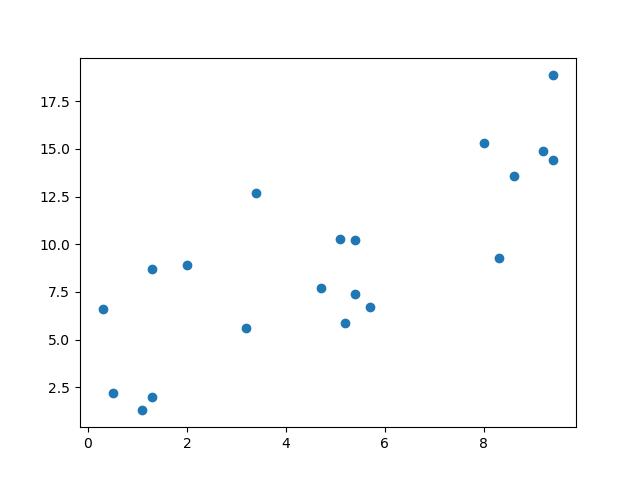

In [26]:
%python

import matplotlib.pyplot as plt

pdDF = df.toPandas()

fig, ax = plt.subplots() 
ax.scatter(pdDF["x"], pdDF["y"], alpha=1)
display(fig)

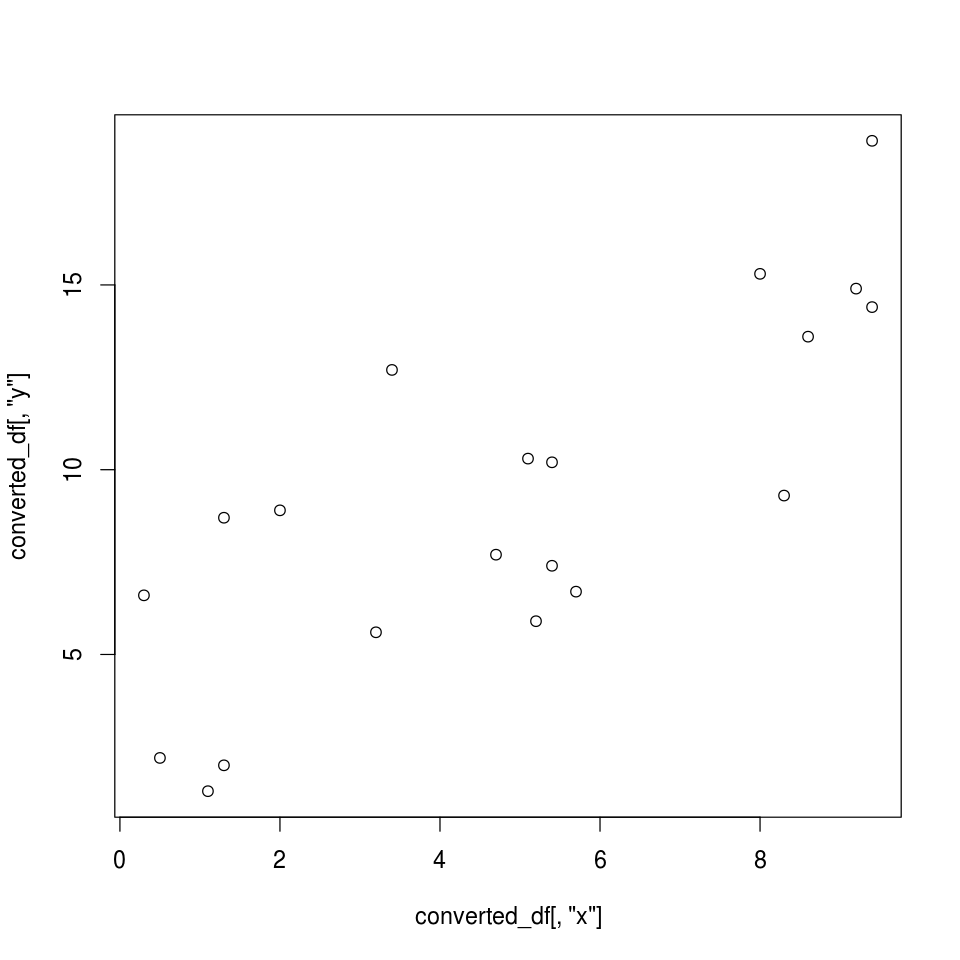

In [27]:
%r

converted_df <- collect(df)

plot(converted_df[,"x"], converted_df[,"y"])